In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.datasets import make_blobs
from svm import MultiClassSVM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score
import seaborn as sns
import pickle

In [12]:
data_path = 'FourClassDS.csv'
data = pd.read_csv(data_path)

In [13]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Pickle the instance
with open('standart_scaler.pkl', 'wb') as output:  # Note 'wb' for write binary
    pickle.dump(scaler, output, pickle.HIGHEST_PROTOCOL)

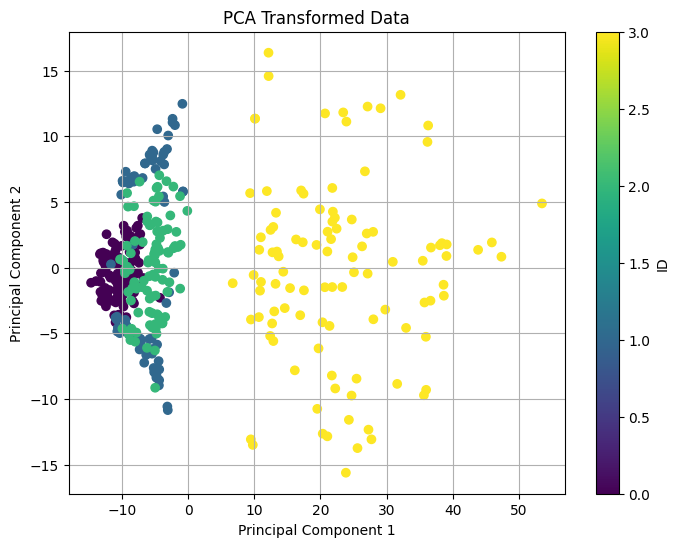

In [16]:
# Apply PCA to reduce dimensionality to 2 for visualization
pca = PCA(n_components=120)
X_pca = pca.fit_transform(X)

# Display the transformed features shape and variance ratio
X_pca_shape = X_pca.shape
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='ID')
plt.grid(True)
plt.show()

In [17]:
X = X_pca

In [18]:
# Separate features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### Kernel Trick (G-RBF)

In [19]:
from kernels import GRBF

In [20]:
multiSVM = MultiClassSVM()
multiSVM.train(X_train, y_train)
predictions = multiSVM.predict(X_train)

In [21]:
train_predictions = multiSVM.predict(X_train)
test_predictions = multiSVM.predict(X_test)
print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

0.5884146341463414
0.5542168674698795


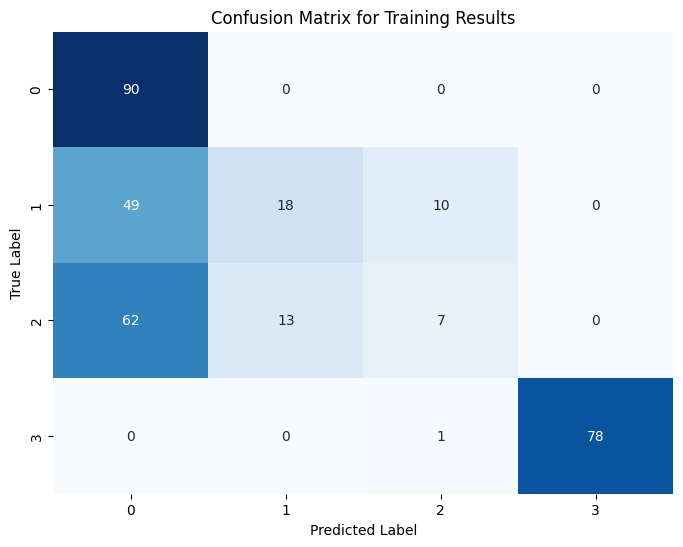

In [22]:
conf_matrix_train = confusion_matrix(y_train, train_predictions)
conf_matrix_test = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Results')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
macro_prec = precision_score(y_train, train_predictions, average='macro')
micro_prec = precision_score(y_train, train_predictions, average='micro')

macro_recall = recall_score(y_train, train_predictions, average='macro')
micro_recall = recall_score(y_train, train_predictions, average='micro')

macro_f1 = f1_score(y_train, train_predictions, average='macro')
micro_f1 = f1_score(y_train, train_predictions, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.5884146341463414  Macro:  0.6043238110522655
Recall | Micro:  0.5884146341463414  Macro:  0.5766184648941673
F1 Score | Micro:  0.5884146341463414  Macro:  0.5213801519031672


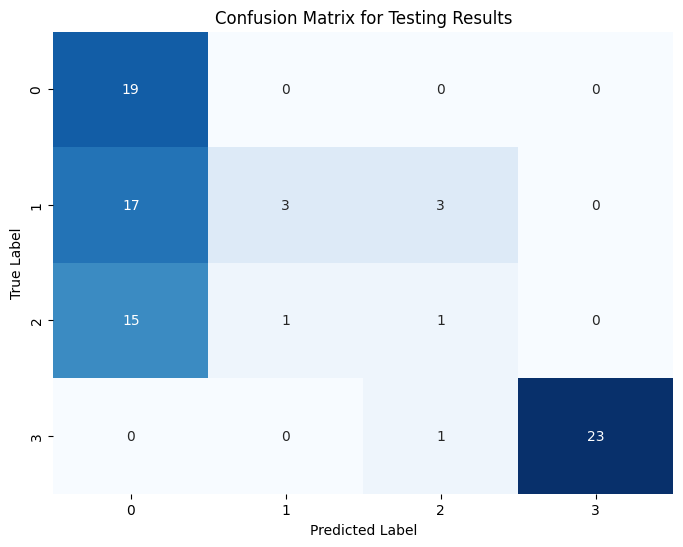

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Testing Results')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
macro_prec = precision_score(y_test, test_predictions, average='macro')
micro_prec = precision_score(y_test, test_predictions, average='micro')

macro_recall = recall_score(y_test, test_predictions, average='macro')
micro_recall = recall_score(y_test, test_predictions, average='micro')

macro_f1 = f1_score(y_test, test_predictions, average='macro')
micro_f1 = f1_score(y_test, test_predictions, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.5542168674698795  Macro:  0.5806372549019607
Recall | Micro:  0.5542168674698795  Macro:  0.5368979113384484
F1 Score | Micro:  0.5542168674698795  Macro:  0.45867796506094377


In [26]:
# Pickle the instance
with open('svm_raw.pkl', 'wb') as output:  # Note 'wb' for write binary
    pickle.dump(multiSVM, output, pickle.HIGHEST_PROTOCOL)